(25.0, 35.0) is a Pikachu
(15.0, 14.0) is a Pichu
(26.0, 30.0) is a Pichu
(22.0, 45.0) is a Pikachu


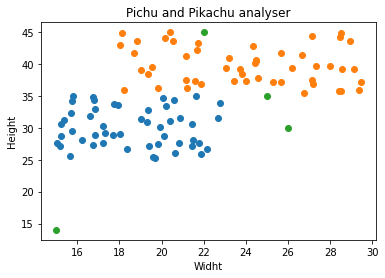

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"
testPointsFiles = "files/test_points.txt"

testlistIndex = 0
testWidthHeight = 0
pichuIndex = 0
pikachuIndex = 0
testPointIndex = 0
identifiedPoint = 0

pichuPoint = 0
pikachuPoint = 0
pichuDistance = []
pikachuDistance = []

pichuWidht = []
pichuHeight = []
pikachuWidht = []
pikachuHeight = []
testPointsList = []
testWidth = []
testHeight = []

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:    ## Opens the files as a variable for easy use
    for i, pichuData in enumerate(pichu.readlines()):     ## Creats a for loop that reads the data from a specifc file line by line.
        if i == 0:  ## Skips the first line so that it does not get read
            continue

        pichuData = pichuData.replace("(", "")  ## Removes ( from the string
        pichuData = pichuData.replace(")", "")  ## - || -  ) -     ||     -
        pichuData = pichuData.replace("\n", "") ## Removes newlines

        widht, height = pichuData.split(",")    # Splits the data into two diffrent points

        pichuWidht.append(widht)
        pichuHeight.append(height)
    
    for i, pikachuData in enumerate(pikachu.readlines()):
        if i == 0:
            continue

        pikachuData = pikachuData.replace("(", "") ## Cleans up the data from unnecessary characters 
        pikachuData = pikachuData.replace(")", "")
        pikachuData = pikachuData.replace("\n", "")

        widht, height = pikachuData.split(",")

        pikachuWidht.append(widht)
        pikachuHeight.append(height)

with open(testPointsFiles, "r") as testPoint: ## Cleans up the test data
    testPoints = testPoint.readline()
    testPoints = testPoints.replace("(", "")
    testPoints = testPoints.replace(" ", "")
    testPoints = testPoints.replace(")", "")
    testPointsList = testPoints.split(",")

testPointsList = [float(i) for i in testPointsList] ## Turns the test points in to floats.

for _ in testPointsList: ## Splits up the test data into widht and height
    if testlistIndex % 2 == 0:
        testWidth.append(testPointsList[testlistIndex])
        testlistIndex += 1
    elif testlistIndex % 2 != 0:
        testHeight.append(testPointsList[testlistIndex])
        testlistIndex += 1

pichuWidht = [float(i) for i in pichuWidht]     ##Converts all strings in the list to floats
pichuHeight = [float(i) for i in pichuHeight]

pikachuWidht = [float(i) for i in pikachuWidht]
pikachuHeight = [float(i) for i in pikachuHeight]

pichuWidhtPoints = np.array(pichuWidht)     ## Creats an array out of the assigned list 
pichuHeightPoints = np.array(pichuHeight)   ## Information and code taken from -> https://www.codespeedy.com/how-to-plot-points-in-matplotlib-with-python/

pikachuWidhtPoints = np.array(pikachuWidht)
pikachuHeightPoints = np.array(pikachuHeight)

testPointsWidht = np.array(testWidth)
testPointsHeight = np.array(testHeight)

for _ in testWidth:     ## Runs for each item in testWidth
    for _ in pichuWidht:    ## Runs for each item in assaigend list
        identifiedpointpichu = math.sqrt((testWidth[testPointIndex] - pichuWidht[pichuIndex])**2 + (testHeight[testPointIndex] - pichuHeight[pichuIndex])**2) ## Calculates the Euclidean distans to all points
        pichuIndex += 1
        pichuDistance.append(identifiedpointpichu)

    for _ in pikachuWidht:
        identifiedpointpikachu = math.sqrt((testWidth[testPointIndex] - pikachuWidht[pikachuIndex])**2 + (testHeight[testPointIndex] - pikachuHeight[pikachuIndex])**2)
        pikachuIndex += 1
        pikachuDistance.append(identifiedpointpikachu)

    distance = pichuDistance + pikachuDistance ## Combinds both lists
    distanceIndex = np.argmin(distance) ## Takes out the lowest values index

    if distanceIndex >= 50: ## Checks if the lowest values index is above 50
        print(f"{testWidth[testWidthHeight], testHeight[testWidthHeight]} is a Pikachu")
        testWidthHeight += 1
    else:
        print(f"{testPointsWidht[testWidthHeight], testHeight[testWidthHeight]} is a Pichu")
        testWidthHeight += 1

    pichuDistance.clear()
    pikachuDistance.clear()
    distance.clear()
    pichuIndex = 0
    pikachuIndex = 0
    testPointIndex += 1

plt.scatter(pichuWidhtPoints, pichuHeightPoints)  ## Plots out all the data points
plt.scatter(pikachuWidhtPoints, pikachuHeightPoints)
plt.scatter(testPointsWidht, testPointsHeight)
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")
plt.show()

could not convert string to float: 'fem'
could not convert string to float: 'fem'
could not convert string to float: 'fem'
could not convert string to float: 'fem'
Ange ett positivt tal för bredden. Inte -34.0 
Ange ett positivt tal för höjden. Inte -18.0 
(17.0, 18.0) is a Pichu


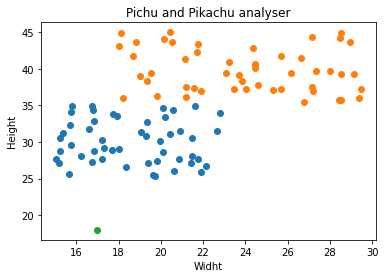

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"

pichuIndex = 0
pikachuIndex = 0
testPointIndex = 0
identifiedPoint = 0

pichuPoint = 0
pikachuPoint = 0
pichuDistance = []
pikachuDistance = []

pichuWidht = []
pichuHeight = []
pikachuWidht = []
pikachuHeight = []

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:    ## Opens the files as a variable for easy use
    for i, pichuData in enumerate(pichu.readlines()):     ## Creats a for loop that reads the data from a specifc file line by line.
        if i == 0:  ## Skips the first line so that it does not get read
            continue

        pichuData = pichuData.replace("(", "")  ## Removes ( from the string
        pichuData = pichuData.replace(")", "")  ## - || -  ) -     ||     -
        pichuData = pichuData.replace("\n", "") ## Removes newlines

        widht, height = pichuData.split(",")    # Splits the data into two diffrent points

        pichuWidht.append(widht)
        pichuHeight.append(height)
    
    for i, pikachuData in enumerate(pikachu.readlines()):
        if i == 0:
            continue

        pikachuData = pikachuData.replace("(", "") ## Cleans up the data from unnecessary characters 
        pikachuData = pikachuData.replace(")", "")
        pikachuData = pikachuData.replace("\n", "")

        widht, height = pikachuData.split(",")

        pikachuWidht.append(widht)
        pikachuHeight.append(height)

while True:
    userWidht = input("Ange en bredd")
    userHeight = input("Ange en höjd")

    try:
        userWidht = float(userWidht)
        userHeight = float(userHeight)
        if userWidht <= 0:
            raise ValueError (f"Ange ett positivt tal för bredden. Inte {userWidht} ")
        if userHeight <= 0:
            raise ValueError (f"Ange ett positivt tal för höjden. Inte {userHeight} ")
        break 
    except ValueError as err:
        print(err)

pichuWidht = [float(i) for i in pichuWidht]     ##Converts all strings in the list to floats
pichuHeight = [float(i) for i in pichuHeight]

pikachuWidht = [float(i) for i in pikachuWidht]
pikachuHeight = [float(i) for i in pikachuHeight]

pichuWidhtPoints = np.array(pichuWidht)     ## Creats an array out of the assigned list 
pichuHeightPoints = np.array(pichuHeight)   ## Information and code taken from -> https://www.codespeedy.com/how-to-plot-points-in-matplotlib-with-python/

pikachuWidhtPoints = np.array(pikachuWidht)
pikachuHeightPoints = np.array(pikachuHeight)

testPointsWidht = np.array(testWidth)
testPointsHeight = np.array(testHeight)


for _ in pichuWidht:    ## Runs for each item in assaigend list
    identifiedpointpichu = math.sqrt((userWidht - pichuWidht[pichuIndex])**2 + (userHeight - pichuHeight[pichuIndex])**2) ## Calculates the Euclidean distans to all points
    pichuIndex += 1
    pichuDistance.append(identifiedpointpichu)

for _ in pikachuWidht:
    identifiedpointpikachu = math.sqrt((userWidht - pikachuWidht[pikachuIndex])**2 + (userWidht - pikachuHeight[pikachuIndex])**2)
    pikachuIndex += 1
    pikachuDistance.append(identifiedpointpikachu)

distance = pichuDistance + pikachuDistance ## Combinds both lists
distanceIndex = np.argmin(distance) ## Takes out the lowest values index

if distanceIndex >= 50: ## Checks if the lowest values index is above 50
    print(f"{userWidht, userHeight} is a Pikachu")
    testWidthHeight += 1
else:
    print(f"{userWidht, userHeight} is a Pichu")
    testWidthHeight += 1

pichuDistance.clear()
pikachuDistance.clear()
distance.clear()
pichuIndex = 0
pikachuIndex = 0

plt.scatter(pichuWidhtPoints, pichuHeightPoints)  ## Plots out all the data points
plt.scatter(pikachuWidhtPoints, pikachuHeightPoints)
plt.scatter(userWidht, userHeight)
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")
plt.show()